<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Cara2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca dataset
df = pd.read_csv('/content/PKH_dataset_desa_Kodasari.csv')


In [19]:
df

,Umur,Status Pernikahan,Jenis Pekerjaan,Penghasilan,Jumlah Keluarga,Penerima PKH
0,56,Belum Menikah,Pedagang,3058972,5,0
1,69,Menikah,Petani,2602186,4,0
2,46,Duda,Wiraswasta,2968010,2,0
3,32,Belum Menikah,Wiraswasta,595131,2,0
4,60,Duda,PNS,3482100,9,0
...,...,...,...,...,...,...
495,65,Duda,Wiraswasta,2639067,8,0
496,42,Belum Menikah,PNS,1309930,2,0
497,57,Janda,Pedagang,102430,6,1
498,62,Duda,Buruh,834070,5,1


[[71  8]
 [15  6]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        79
           1       0.43      0.29      0.34        21

    accuracy                           0.77       100
   macro avg       0.63      0.59      0.60       100
weighted avg       0.74      0.77      0.75       100



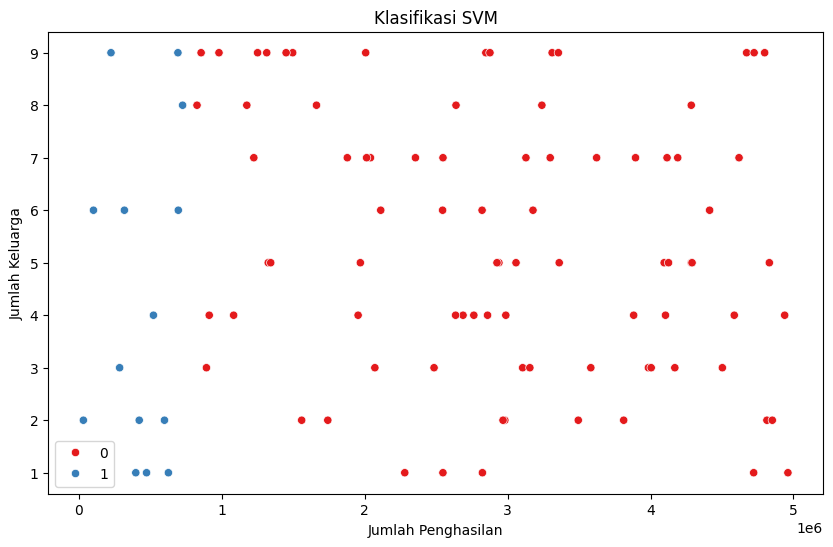

In [20]:
# 2. Menyiapkan data
# Misalkan kita memiliki kolom 'target' sebagai label untuk klasifikasi
# Pilih kolom 'jumlah penghasilan' dan 'jumlah keluarga' sebagai fitur
X = df[['Penghasilan', 'Jumlah Keluarga']]
# y = df[['target'
y = df['Penerima PKH']  # Gantilah dengan nama kolom target yang sebenarnya

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Melatih model SVM
svm_model = SVC(kernel='linear')  # Menggunakan kernel linear sebagai contoh
svm_model.fit(X_train, y_train)

# 4. Evaluasi model
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualisasi hasil klasifikasi
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['Penghasilan'], y=X_test['Jumlah Keluarga'], hue=y_pred, palette='Set1')
plt.title('Klasifikasi SVM')
plt.xlabel('Jumlah Penghasilan')
plt.ylabel('Jumlah Keluarga')
plt.show()


In [21]:
# Membuat data baru secara manual
data_baru_manual = pd.DataFrame({
    'Penghasilan': [300000, 1200000, 4500000],
    'Jumlah Keluarga': [8, 4, 5]
})

# Menggunakan model yang telah dilatih untuk memprediksi kelas data baru
prediksi_baru_manual = svm_model.predict(data_baru_manual)

# Menampilkan hasil prediksi
data_baru_manual['prediksi'] = prediksi_baru_manual
print(data_baru_manual)


   Penghasilan  Jumlah Keluarga  prediksi
0       300000                8         1
1      1200000                4         0
2      4500000                5         0
